In [1]:
!pip install nltk 

In [2]:
!pip install wordcloud

In [3]:
#nltk.download()

In [4]:
import nltk

In [5]:
cd C:\Users\Administrator\Desktop\mongodb\data for mongo

C:\Users\Administrator\Desktop\mongodb\data for mongo


In [6]:
import pandas as pd
reviews = pd.read_csv("K8 Reviews v0.2.csv")

In [7]:
reviews.shape

(14675, 2)

In [8]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [9]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [10]:
reviews_combined= " ".join(reviews.review.values)

In [11]:
reviews_combined[:100]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hel'

In [12]:
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

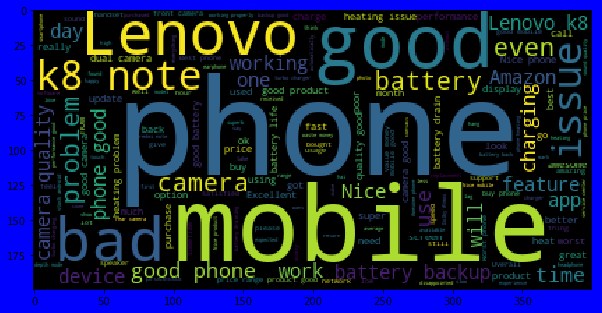

In [13]:
plt.figure(figsize=(10 , 8) , edgecolor ="green" ,facecolor = "blue" )
word_cloud = WordCloud().generate(reviews_combined)
plt.imshow(word_cloud)
plt.title("")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

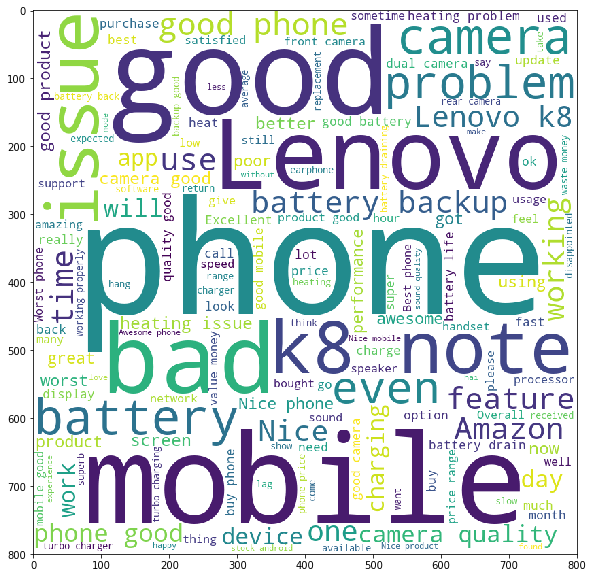

In [14]:
plt.figure(figsize=(15 ,10))
wordcloud = WordCloud(width = 800 , height = 800 , background_color = "white" , max_words = 150).\
            generate_from_text(reviews_combined)
plt.imshow(wordcloud)
plt.title("")
plt.show

In [15]:
all_terms = []
fdict = {}
all_terms = reviews_combined.split(" ")
for i in all_terms:
    fdict[i]=fdict.get(i ,0)+1
      
fdict

{'Good': 1315,
 'but': 2222,
 'need': 196,
 'updates': 98,
 'and': 5078,
 'improvements': 4,
 'Worst': 373,
 'mobile': 1654,
 'i': 832,
 'have': 1221,
 'bought': 270,
 'ever,': 4,
 'Battery': 800,
 'is': 10151,
 'draining': 180,
 'like': 897,
 'hell,': 3,
 'backup': 543,
 'only': 700,
 '6': 170,
 'to': 4627,
 '7': 78,
 'hours': 317,
 'with': 2392,
 'internet': 106,
 'uses,': 1,
 'even': 659,
 'if': 521,
 'I': 3418,
 'put': 64,
 'idle': 50,
 'its': 664,
 'getting': 363,
 'discharged.This': 1,
 'biggest': 26,
 'lie': 4,
 'from': 894,
 'Amazon': 464,
 '&': 435,
 'Lenove': 3,
 'which': 482,
 'not': 5162,
 'at': 789,
 'all': 734,
 'expected,': 11,
 'they': 425,
 'are': 1289,
 'making': 35,
 'full': 316,
 'by': 576,
 'saying': 33,
 'that': 964,
 'battery': 2155,
 '4000MAH': 6,
 'booster': 3,
 'charger': 326,
 'fake,': 1,
 'it': 2975,
 'takes': 275,
 'least': 34,
 '4': 350,
 '5': 267,
 'be': 621,
 'fully': 101,
 "charged.Don't": 1,
 'know': 131,
 'how': 102,
 'Lenovo': 1278,
 'will': 640,
 's

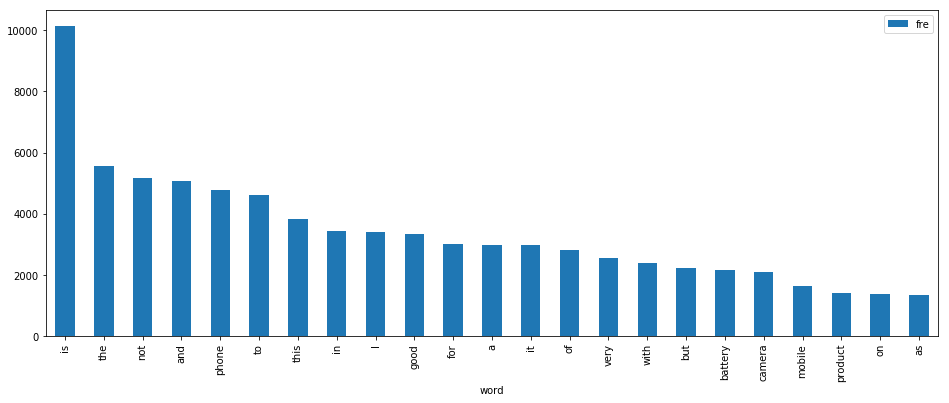

In [16]:
fre = {"word":list(fdict.keys()),"fre":list(fdict.values())}
df_dict = pd.DataFrame(fre)
df_dict.sort_values('fre',ascending=False).head(23).plot(kind = "bar",x='word',y='fre' ,figsize = (16 , 6))

Problem with the above visuals:

1.  case is uniform
2. Punctuations and stopwords 
3. words with differsnt tence from like charged , charging , charges has its root from in charge


In [17]:
from nltk.tokenize import word_tokenize
all_terms = word_tokenize(reviews_combined.lower())

In [18]:
all_terms

['good',
 'but',
 'need',
 'updates',
 'and',
 'improvements',
 'worst',
 'mobile',
 'i',
 'have',
 'bought',
 'ever',
 ',',
 'battery',
 'is',
 'draining',
 'like',
 'hell',
 ',',
 'backup',
 'is',
 'only',
 '6',
 'to',
 '7',
 'hours',
 'with',
 'internet',
 'uses',
 ',',
 'even',
 'if',
 'i',
 'put',
 'mobile',
 'idle',
 'its',
 'getting',
 'discharged.this',
 'is',
 'biggest',
 'lie',
 'from',
 'amazon',
 '&',
 'lenove',
 'which',
 'is',
 'not',
 'at',
 'all',
 'expected',
 ',',
 'they',
 'are',
 'making',
 'full',
 'by',
 'saying',
 'that',
 'battery',
 'is',
 '4000mah',
 '&',
 'booster',
 'charger',
 'is',
 'fake',
 ',',
 'it',
 'takes',
 'at',
 'least',
 '4',
 'to',
 '5',
 'hours',
 'to',
 'be',
 'fully',
 'charged.do',
 "n't",
 'know',
 'how',
 'lenovo',
 'will',
 'survive',
 'by',
 'making',
 'full',
 'of',
 'us.please',
 'don',
 ';',
 't',
 'go',
 'for',
 'this',
 'else',
 'you',
 'will',
 'regret',
 'like',
 'me',
 '.',
 'when',
 'i',
 'will',
 'get',
 'my',
 '10',
 '%',
 'ca

In [19]:
from nltk.probability import FreqDist

In [20]:
fdist  = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

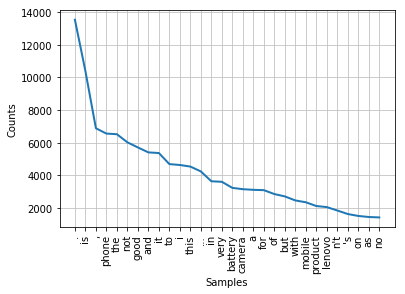

In [21]:

fdist.plot(30 , cumulative = False)

In [22]:
from string import punctuation
from nltk.corpus import stopwords

In [23]:
stop_nltk = stopwords.words("english")
stop_nltk

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [25]:
stop_nltk = stopwords.words("english")
txt = " I dont care , more"
tok = word_tokenize(txt.lower())

In [26]:
[word for word in tok if\
word not in stop_nltk and word not in list(punctuation)]

['dont', 'care']

In [27]:
stop_updated = stop_nltk + ["...", "..","!!"]+["phone","moblie","levono","k8","note","amazon","n't"]

In [28]:
reviews_updated1 = [term for term in all_terms if term if term not in stop_updated\
                 and term not in list(punctuation) and len(term)>2]
reviews_updated1

['good',
 'need',
 'updates',
 'improvements',
 'worst',
 'mobile',
 'bought',
 'ever',
 'battery',
 'draining',
 'like',
 'hell',
 'backup',
 'hours',
 'internet',
 'uses',
 'even',
 'put',
 'mobile',
 'idle',
 'getting',
 'discharged.this',
 'biggest',
 'lie',
 'lenove',
 'expected',
 'making',
 'full',
 'saying',
 'battery',
 '4000mah',
 'booster',
 'charger',
 'fake',
 'takes',
 'least',
 'hours',
 'fully',
 'charged.do',
 'know',
 'lenovo',
 'survive',
 'making',
 'full',
 'us.please',
 'else',
 'regret',
 'like',
 'get',
 'cash',
 'back',
 'already',
 'january..',
 'good',
 'worst',
 'everthey',
 'changed',
 'last',
 'problem',
 'still',
 'returning',
 '.highly',
 'disappointing',
 'telling',
 'buyi',
 'totally',
 'disappointedpoor',
 'batterypoor',
 'camerawaste',
 'money',
 'awesome',
 'charging',
 'heats',
 'allot..really',
 'genuine',
 'reason',
 'hate',
 'lenovo',
 'battery',
 'level',
 'worn',
 'hitting',
 'problems',
 'hanging',
 'problems',
 'lenovo',
 'service',
 'statio

In [29]:
from nltk.stem import SnowballStemmer

In [30]:
stemmer_r = SnowballStemmer("english")
reviews_change =([stemmer_r.stem(word) for word in reviews_updated1])

In [31]:
print(len(set(reviews_change)))

16159


In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
stemmer_lem = WordNetLemmatizer()
lem=[stemmer_lem.lemmatize(word) for word in reviews_updated1]
print(len(set(lem)))

17900


conclusion:
    1.  Stemmer helps to reduce the number of distinct words in the corpus
    2. Lemmatizer help to retain the meaing of the words effectively use when the context of the words in importamnt
    3. Stemmer is used whien i have an intent of getting lesser words which reduse the total number of feature

In [34]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_r.stem(term) for term in tokens if term not in stop_updated and term not in list(punctuation) and len(term)>2]
    res = " ".join(stemmed)
    return res

In [35]:
reviews["clean_review"] = reviews.review.apply(clean_txt)

In [55]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobil bought ever batteri drain like hel...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...


In [93]:
stop_nltk = stopwords.words("english")
kdict= "the battry of this mobile is not good"
ls = ["not","nor","no"]
[i for i in stop_nltk if i not in ls][:3]

['i', 'me', 'my']

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
count_vectorizer_bg = CountVectorizer(ngram_range = (2,2),max_features=3)
x_bg = count_vectorizer_bg.fit_transform(reviews["clean_review"])
count_vectorizer_bg.get_feature_names()

['batteri backup', 'batteri drain', 'camera qualiti']

In [96]:
df = pd.DataFrame(x_bg.toarray(),columns = count_vectorizer_bg.get_feature_names() )
df2 = df.sum()

In [97]:
import matplotlib.pyplot as plt

In [104]:
ab=pd.DataFrame()

In [105]:
ab["Word"]=df.sum().index

In [110]:
ab["Values"]=df.sum().values

In [111]:
ab

,Word,Values
0,batteri backup,593
1,batteri drain,490
2,camera qualiti,473


In [117]:
new_df =" ".join(reviews.clean_review.values)
new_df

"good need updat improv worst mobil bought ever batteri drain like hell backup hour internet use even put mobil idl get discharged.thi biggest lie lenov expect make full say batteri 4000mah booster charger fake take least hour fulli charged.do know lenovo surviv make full us.pleas els regret like get cash back alreadi january.. good worst everthey chang last problem still return .high disappoint tell buyi total disappointedpoor batterypoor camerawast money awesom charg heat allot..r genuin reason hate lenovo batteri level worn hit problem hang problem lenovo servic station ahmedabad one year warranti chang lenovo lot glitch dont buy thing better option wrost good charger work damag within month purchas item much heat batteri life poor face batteri problem motherboard problem month worst mobil life good slim good battri backup good screen love headset avail everi time automat kind suggest best product accord prize rang specif comparison anoth mobil rang bought seal paid 10,999 also hdpf

In [123]:
new_df2= pd.DataFrame([new_df],columns = ["text"])

In [127]:
count_vector = CountVectorizer()
k = count_vector.fit_transform(new_df2["text"])

In [128]:
k.toarray()

array([[ 6, 12,  1, ...,  1,  1,  1]], dtype=int64)

In [131]:
DTM = pd.DataFrame(k.toarray(),columns = count_vector.get_feature_names())

,00,000,000000000,000mah,01,01_04_2018,02,02may,03,04,...,இல,என,ஏற,ஒன,கவ,பரம,பலம,ரண,றப,லல
0,6,12,1,3,3,1,3,1,1,2,...,1,1,1,1,1,1,1,1,1,1


In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
tfidf = TfidfVectorizer()
df_tfidf = tfidf.fit_transform(new_df2["text"])

In [139]:
pd.DataFrame(df_tfidf.toarray(),columns = tfidf.get_feature_names())

,00,000,000000000,000mah,01,01_04_2018,02,02may,03,04,...,இல,என,ஏற,ஒன,கவ,பரம,பலம,ரண,றப,லல
0,0.000505,0.001009,0.000084,0.000252,0.000252,0.000084,0.000252,0.000084,0.000084,0.000168,...,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084


In [140]:
count_vectorizer_bg = CountVectorizer(ngram_range = (2,2))
x_bg = count_vectorizer_bg.fit_transform(new_df2["text"])
count_vectorizer_bg.get_feature_names()

['00 00',
 '00 box',
 '00 hour',
 '00 realli',
 '00 silent',
 '00 usual',
 '000 000',
 '000 camera',
 '000 charger',
 '000 discount',
 '000 even',
 '000 good',
 '000 miss',
 '000 mobil',
 '000 phone',
 '000 price',
 '000 repair',
 '000 screen',
 '000000000 zero',
 '000mah batteri',
 '01 09',
 '01 2018',
 '01 got',
 '01_04_2018 return',
 '02 09',
 '02 2018',
 '02 2018wast',
 '02may start',
 '03 2018',
 '04 2018',
 '04 2018lenovo',
 '05 09',
 '05 18',
 '05 2018',
 '05 may',
 '06 2018',
 '08 10',
 '08 17',
 '08 2017',
 '08 june',
 '09 08',
 '09 10',
 '09 17',
 '09 2017',
 '09 2017realli',
 '09953756674 gorrila',
 '0a 0a',
 '0a charger',
 '0ct2017 charg',
 '0perform 10overal',
 '0signal strength',
 '0too much',
 '10 000',
 '10 10',
 '10 100',
 '10 10batteri',
 '10 10graphics',
 '10 10heating',
 '10 10ram',
 '10 11',
 '10 12',
 '10 13',
 '10 1300',
 '10 15',
 '10 15k',
 '10 17',
 '10 1pm',
 '10 20',
 '10 2017',
 '10 5finger',
 '10 5phon',
 '10 6bakwa',
 '10 7display',
 '10 8battery',
 '10 9

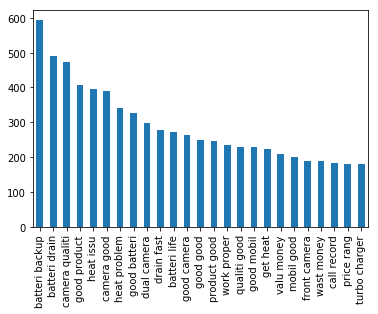

In [141]:
DTM_bg=pd.DataFrame(x_bg.toarray(),columns=count_vectorizer_bg.get_feature_names())

import matplotlib.pyplot as plt
%matplotlib inline
df_T=DTM_bg.T
df_T[0].sort_values(ascending=False).head(25).plot(kind='bar')